In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

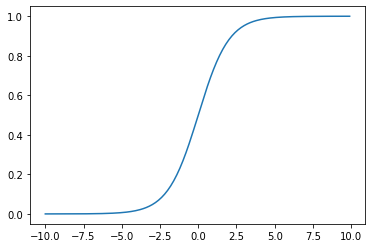

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

In [3]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [5]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test.head()

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica


## Overview

1. regression for petal width
2. binary classification for setosa: T/F
3. binary classification for setosa: prob(T)
4. multi-class classification for variety

In [30]:
# model 1: features => petal width
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
reg = LinearRegression(fit_intercept=False)
reg.fit(train[xcols], train["petal width (cm)"])
print(reg.score(test[xcols], test["petal width (cm)"]))
test["predict"] = reg.predict(test[xcols])
test

0.5805709195672956


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,1.327769,0.065434
134,6.1,2.6,1,1.4,False,virginica,1.590835,0.018735
114,5.8,2.8,1,2.4,False,virginica,1.279061,0.086894
42,4.4,3.2,1,0.2,True,setosa,0.083889,0.970894
109,7.2,3.6,1,2.5,False,virginica,1.889735,0.010675
57,4.9,2.4,1,1.0,False,versicolor,0.830818,0.353891
1,4.9,3.0,1,0.2,True,setosa,0.538569,0.775434
70,5.9,3.2,1,1.8,False,versicolor,1.155681,0.189151
25,5.0,3.0,1,0.2,True,setosa,0.610022,0.712672
84,5.4,3.0,1,1.5,False,versicolor,0.895833,0.397711


In [31]:
# model 2: features => setosa (is it one?)
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
cls = LogisticRegression(fit_intercept=False)
cls.fit(train[xcols], train["setosa"])
print(cls.score(test[xcols], test["setosa"])) # accuracy (what % did we get right?)
test["predict"] = cls.predict(test[xcols])
test

1.0


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.065434
134,6.1,2.6,1,1.4,False,virginica,False,0.018735
114,5.8,2.8,1,2.4,False,virginica,False,0.086894
42,4.4,3.2,1,0.2,True,setosa,True,0.970894
109,7.2,3.6,1,2.5,False,virginica,False,0.010675
57,4.9,2.4,1,1.0,False,versicolor,False,0.353891
1,4.9,3.0,1,0.2,True,setosa,True,0.775434
70,5.9,3.2,1,1.8,False,versicolor,False,0.189151
25,5.0,3.0,1,0.2,True,setosa,True,0.712672
84,5.4,3.0,1,1.5,False,versicolor,False,0.397711


In [12]:
# [[False Prob, True Prob],
#  [False Prob, True Prob],
#  ...]
test["setosa_prob"] = cls.predict_proba(test[xcols])[:, 1]
cls.predict_proba(test[xcols])

array([[0.93456595, 0.06543405],
       [0.98126538, 0.01873462],
       [0.91310638, 0.08689362],
       [0.0291064 , 0.9708936 ],
       [0.98932517, 0.01067483],
       [0.64610885, 0.35389115],
       [0.22456635, 0.77543365],
       [0.81084868, 0.18915132],
       [0.2873277 , 0.7126723 ],
       [0.60228931, 0.39771069]])

In [13]:
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,False,0.065434
134,6.1,2.6,1,1.4,False,virginica,False,0.018735
114,5.8,2.8,1,2.4,False,virginica,False,0.086894
42,4.4,3.2,1,0.2,True,setosa,True,0.970894
109,7.2,3.6,1,2.5,False,virginica,False,0.010675
57,4.9,2.4,1,1.0,False,versicolor,False,0.353891
1,4.9,3.0,1,0.2,True,setosa,True,0.775434
70,5.9,3.2,1,1.8,False,versicolor,False,0.189151
25,5.0,3.0,1,0.2,True,setosa,True,0.712672
84,5.4,3.0,1,1.5,False,versicolor,False,0.397711


In [32]:
# model 3: features => variety
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
mult = LogisticRegression(fit_intercept=False)
mult.fit(train[xcols], train["variety"])
print(mult.score(test[xcols], test["variety"]))
test["predict"] = mult.predict(test[xcols])
test

0.9


,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,predict,setosa_prob
82,5.8,2.7,1,1.2,False,versicolor,versicolor,0.065434
134,6.1,2.6,1,1.4,False,virginica,virginica,0.018735
114,5.8,2.8,1,2.4,False,virginica,versicolor,0.086894
42,4.4,3.2,1,0.2,True,setosa,setosa,0.970894
109,7.2,3.6,1,2.5,False,virginica,virginica,0.010675
57,4.9,2.4,1,1.0,False,versicolor,versicolor,0.353891
1,4.9,3.0,1,0.2,True,setosa,setosa,0.775434
70,5.9,3.2,1,1.8,False,versicolor,versicolor,0.189151
25,5.0,3.0,1,0.2,True,setosa,setosa,0.712672
84,5.4,3.0,1,1.5,False,versicolor,versicolor,0.397711


In [16]:
reg, cls, mult

(LinearRegression(), LogisticRegression(), LogisticRegression())

In [18]:
print(reg.coef_)
print()
print(cls.coef_)
print()
print(mult.coef_)

[ 0.71452794 -0.48708032  0.        ]

[[-3.30852859e+00  3.06871640e+00 -3.47832585e-04]]

[[-2.62903541e+00  2.24690576e+00 -2.74957717e-05]
 [ 6.01059000e-01 -1.57847216e+00  1.59536953e-04]
 [ 2.02797641e+00 -6.68433601e-01 -1.32041182e-04]]


In [22]:
X = test[xcols].values

In [33]:
# reg.predict
X @ reg.coef_.reshape(-1,1)

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [35]:
# cls.predict
X @ cls.coef_.reshape(-1,1) > 0

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [38]:
# cls.predict_proba
sigmoid(X @ cls.coef_.reshape(-1,1))

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [39]:
# mult.predict

In [42]:
# each column corresponds to a iris variety
# the column has coefficients to multiply X and score how much it is like that variety
mult.coef_.T

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

In [43]:
X @ mult.coef_.T[:, 0:1]

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

In [44]:
X @ mult.coef_.T[:, 1:2]

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [45]:
# row vector dot coef vector (but nested loop over every row and every set of coef)
X @ mult.coef_.T

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [46]:
(X @ mult.coef_.T).max() # biggest score anywhere

2.4334410884892166

In [48]:
(X @ mult.coef_.T).max(axis=1) # biggest score of each row

array([0.85599987, 1.24321349, 0.70969118, 2.43344109, 0.95384058,
       0.71104461, 0.9289758 , 0.1893321 , 0.7488786 , 0.15757096])

In [49]:
(X @ mult.coef_.T).argmax(axis=1) # index of biggest score of each row

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [51]:
print(mult.classes_)
mult.classes_[[0,0,0,1,2,2]]

['setosa' 'versicolor' 'virginica']


array(['setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica'], dtype=object)

In [52]:
mult.classes_[(X @ mult.coef_.T).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)